## Matrix Factorization Collaborative Filtering [행렬 분해 기반 협업 필터링]

#### 잠재 요인 협업 필터링 (latent factor collaborative filtering)


In [3]:
import pandas as pd  

In [4]:
rating_data = pd.read_csv('./movielens/ratings.csv')
rating_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
movie_data = pd.read_csv('./movielens/movies.csv')
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
print(rating_data.shape)
print(movie_data.shape)

(100004, 4)
(9125, 3)


In [7]:
rating_data.drop('timestamp', axis=1, inplace=True)
rating_data.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [8]:
movie_data.drop('genres', axis=1, inplace=True)
movie_data.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [9]:
user_movie_data = pd.merge(rating_data, movie_data, on='movieId')
user_movie_data.head()

,userId,movieId,rating,title
0,1,31,2.5,Dangerous Minds (1995)
1,7,31,3.0,Dangerous Minds (1995)
2,31,31,4.0,Dangerous Minds (1995)
3,32,31,4.0,Dangerous Minds (1995)
4,36,31,3.0,Dangerous Minds (1995)


In [11]:
print(user_movie_data.shape)

(100004, 4)


column은 movie로 , row 는 userid, 각 데이터는 rating으로 만들어주기

In [12]:
user_movie_rating = user_movie_data.pivot_table('rating', index='userId', columns='title').fillna(0)
user_movie_rating

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
user_movie_rating.shape

(671, 9064)

### 특정 영화와 비슷한 영화 추천 (SVD, Singular Vaue Decomposition 개념 적용)

In [17]:
movie_user_rating = user_movie_rating.values.T
movie_user_rating.shape

(9064, 671)

In [21]:
from sklearn.decomposition import TruncatedSVD


SVD = TruncatedSVD(n_components = 12) # latent 값을 12로 설정
matrix = SVD.fit_transform(movie_user_rating)
matrix.shape # 9064개의 영화 데이터가 12개의 어떤 요소의 값을 가짐

(9064, 12)

In [22]:
matrix[0]

array([ 0.01227491,  0.00250772,  0.01554808, -0.03396507, -0.01446729,
        0.00361546, -0.00219872,  0.04423865, -0.01598983, -0.02184055,
        0.01282183, -0.0083781 ])

In [23]:
import numpy as np
corr = np.corrcoef(matrix)  # 데이터끼리 피어슨 상관계수 규험
corr.shape

(9064, 9064)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

corr2 = corr[:200, :200]
corr2.shape

(200, 200)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

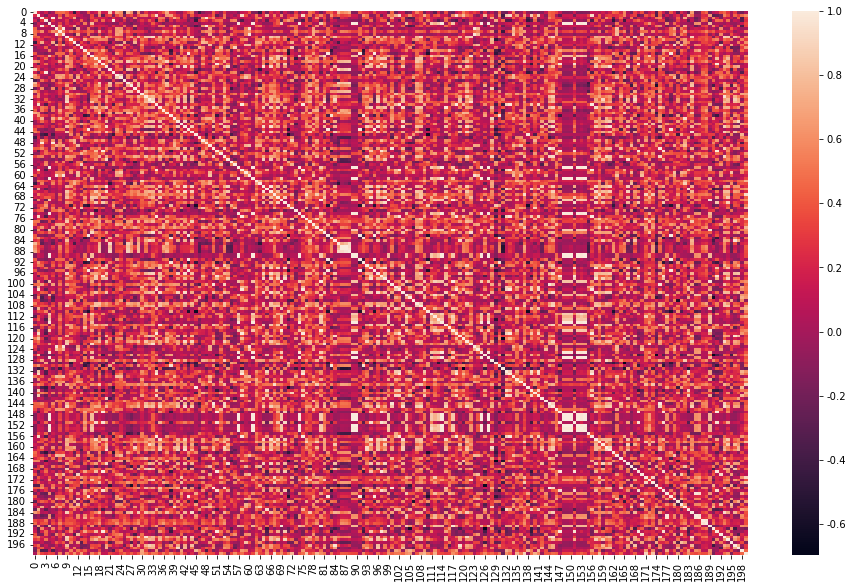

In [27]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

### 대각선이 하얀색 -> 자기 자신과의 관계

In [30]:
movie_title = user_movie_rating.columns
movie_title_list = list(movie_title)
coffey_hands = movie_title_list.index('Guardians of the Galaxy (2014)')

In [31]:
corr_coffey_hands = corr[coffey_hands]
list(movie_title[(corr_coffey_hands >= 0.9)])[:50]

['10,000 BC (2008)',
 '2 Guns (2013)',
 '2012 (2009)',
 '21 (2008)',
 '300: Rise of an Empire (2014)',
 'Abduction (2011)',
 'Adjustment Bureau, The (2011)',
 'Adventures of Tintin, The (2011)',
 'Alice in Wonderland (2010)',
 'Amazing Spider-Man, The (2012)',
 'Angels & Demons (2009)',
 'Ant-Man (2015)',
 'Avatar (2009)',
 'Avengers, The (2012)',
 'Avengers: Age of Ultron (2015)',
 'Batman: The Dark Knight Returns, Part 1 (2012)',
 'Batman: The Dark Knight Returns, Part 2 (2013)',
 'Battle: Los Angeles (2011)',
 'Bee Movie (2007)',
 'Beowulf (2007)',
 'Big Hero 6 (2014)',
 'Bolt (2008)',
 'Brave (2012)',
 'Captain America: Civil War (2016)',
 'Captain America: The First Avenger (2011)',
 'Captain America: The Winter Soldier (2014)',
 'Chronicle (2012)',
 'Click (2006)',
 'Cloverfield (2008)',
 'Cop Out (2010)',
 'Dark Knight Rises, The (2012)',
 'Diary of a Wimpy Kid (2010)',
 'District 9 (2009)',
 'Dredd (2012)',
 'Drillbit Taylor (2008)',
 'Déjà Vu (Deja Vu) (2006)',
 'Edge of Tomor

#### 이것은 사용자가 본 영화 history 고려 X ---> 사용자에게 추천하기에는 부족
